# 📘 **IPL Match & Player Performance Analysis Using Python**

## Project Overview

This project analyzes historical Indian Premier League (IPL) data to extract insights about:

* Most successful teams
* Impact of winning the toss
* Best performing batsmen & bowlers
* Best venue for batting/bowling
* Player of the Match trends

## 🔹 2. Dataset Information

You should have:

* `matches.csv`
* `deliveries.csv`

If you don’t have them yet, I will provide dataset assistance—but let’s assume you uploaded them to Colab.

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set(rc={"figure.figsize": (10, 6)})

## Load the Datasets


In [3]:
matches = pd.read_csv("/content/drive/MyDrive/Dataset - Project/matches.csv")
deliveries = pd.read_csv("/content/drive/MyDrive/Dataset - Project/deliveries.csv")

matches.head()
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Understand the Data

In [4]:
matches.shape
matches.info()
matches.isnull().sum()

deliveries.shape
deliveries.info()
deliveries.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batsman,0
non_striker,0
bowler,0
is_super_over,0


**Observations:**

* IPL matches from: …
* Teams included: …
* Data quality: good / few nulls

## Exploratory Data Analysis (EDA)


### Number of matches per season

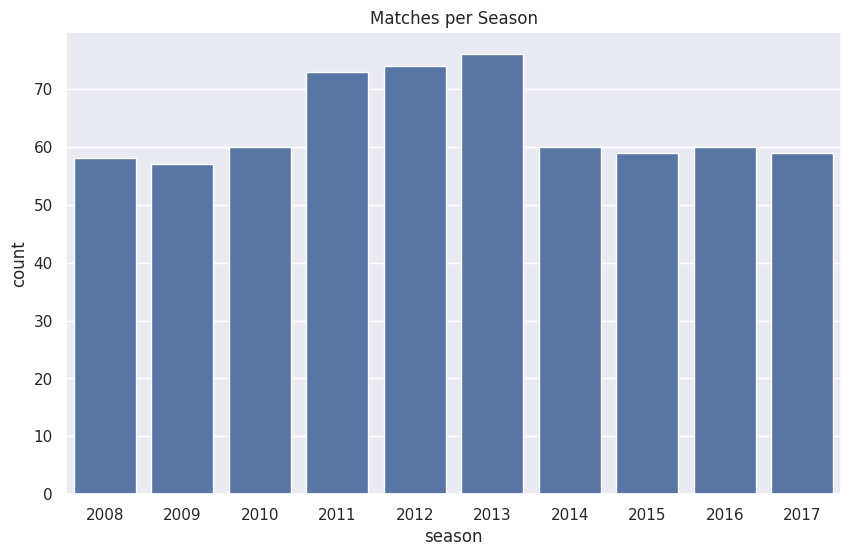

In [5]:
sns.countplot(x="season", data=matches)
plt.title("Matches per Season")
plt.show()

### Number of wins per team

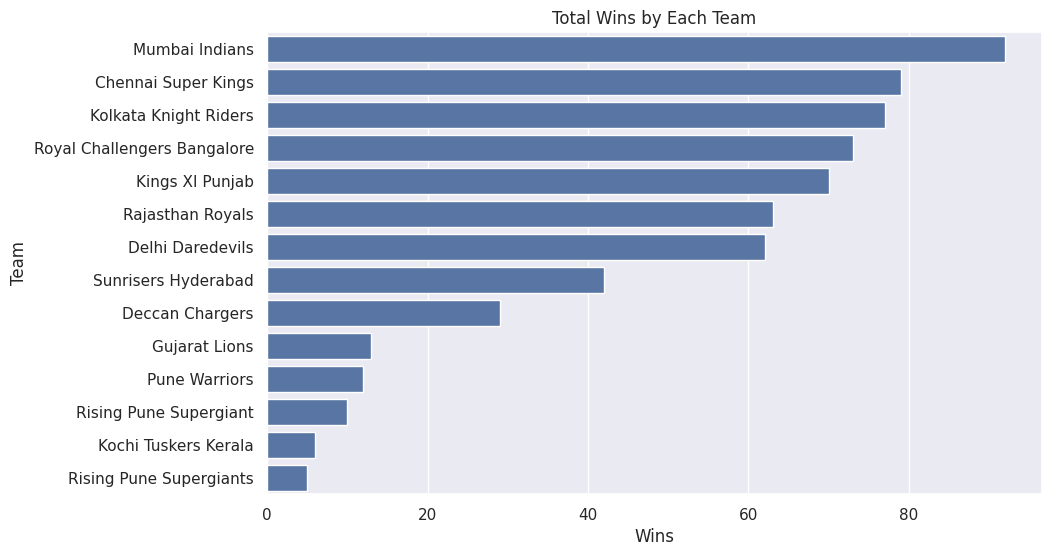

,count
winner,
Mumbai Indians,92
Chennai Super Kings,79
Kolkata Knight Riders,77
Royal Challengers Bangalore,73
Kings XI Punjab,70
Rajasthan Royals,63
Delhi Daredevils,62
Sunrisers Hyderabad,42
Deccan Chargers,29


In [6]:
team_wins = matches["winner"].value_counts()

sns.barplot(y=team_wins.index, x=team_wins.values)
plt.title("Total Wins by Each Team")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.show()

team_wins

**Insight:**

* Most dominant teams: Mumbai Indians


### Toss decision impact

Winning toss vs winning match:

In [7]:
matches["toss_win_equals_match_win"] = matches["toss_winner"] == matches["winner"]
matches["toss_win_equals_match_win"].mean()

np.float64(0.5110062893081762)

If result ~ **0.5** → toss doesn’t matter much

If > **0.6** → winning toss gives advantage

### What decision do teams make after winning toss?

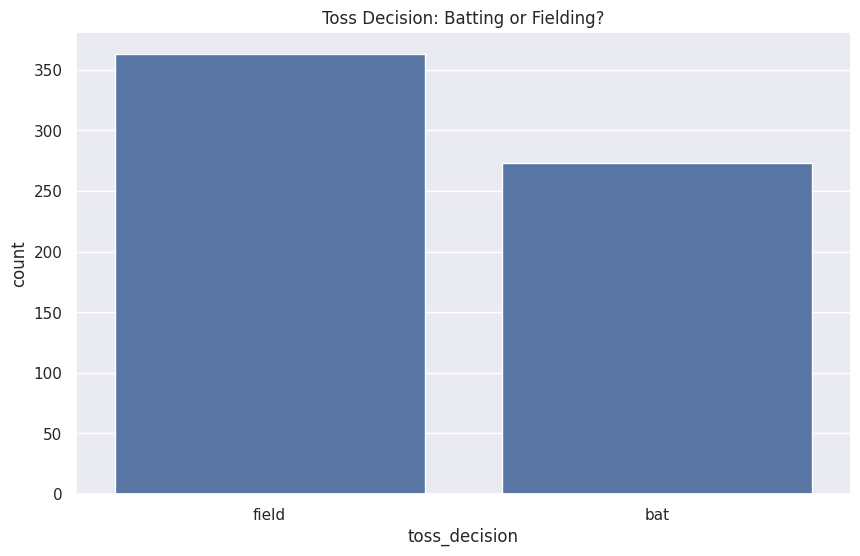

In [8]:
sns.countplot(x="toss_decision", data=matches)
plt.title("Toss Decision: Batting or Fielding?")
plt.show()

### Best venues (by matches hosted)

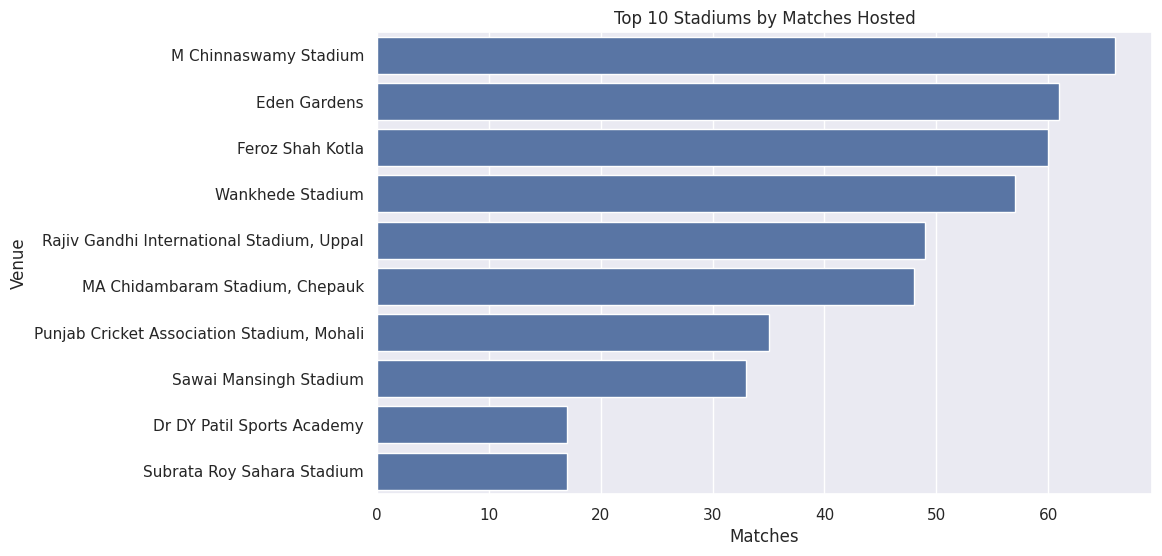

In [10]:
venue_matches = matches["venue"].value_counts().head(10)

sns.barplot(x=venue_matches.values, y=venue_matches.index)
plt.title("Top 10 Stadiums by Matches Hosted")
plt.xlabel("Matches")
plt.ylabel("Venue")
plt.show()

### Player of the Match Awards

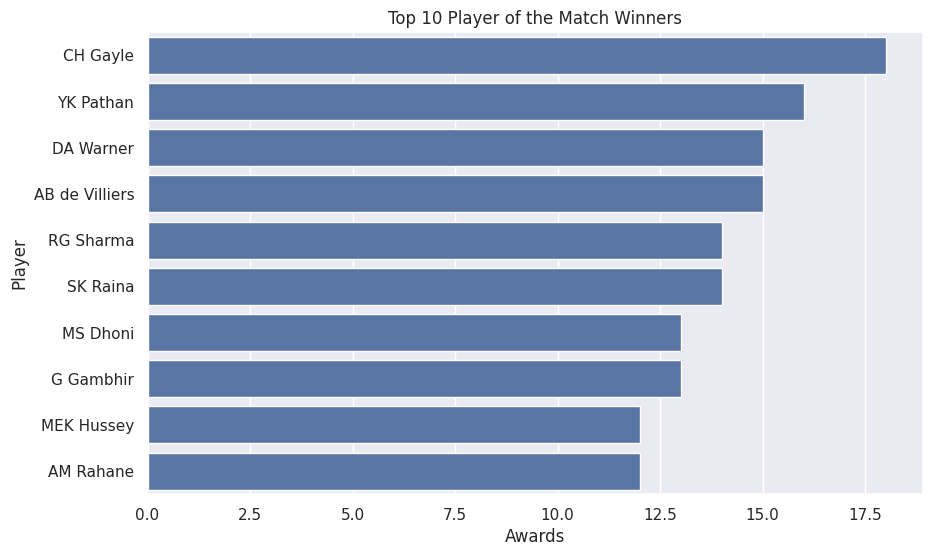

In [12]:
pom = matches["player_of_match"].value_counts().head(10)

sns.barplot(x=pom.values, y=pom.index)
plt.title("Top 10 Player of the Match Winners")
plt.xlabel("Awards")
plt.ylabel("Player")
plt.show()

### Top batsmen (highest runs)

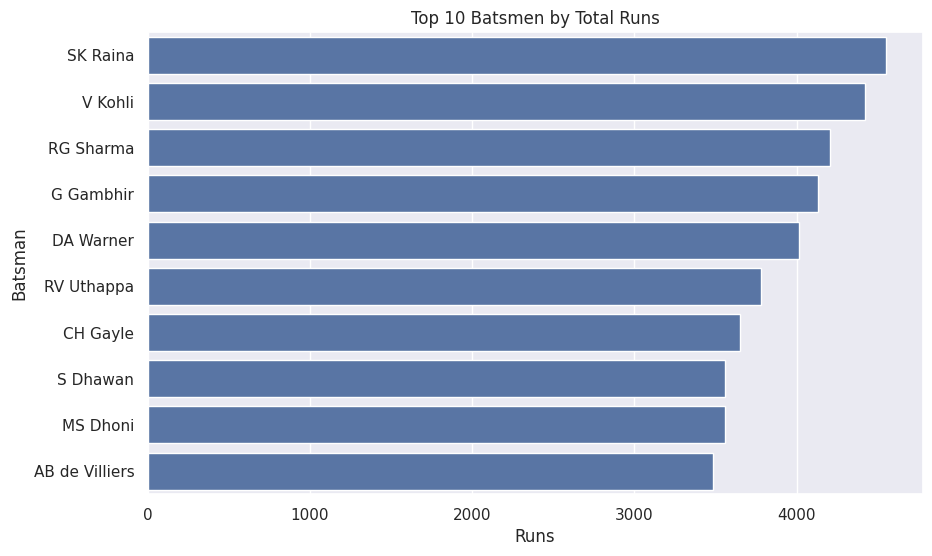

In [13]:
batsman_runs = deliveries.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False).head(10)

sns.barplot(x=batsman_runs.values, y=batsman_runs.index)
plt.title("Top 10 Batsmen by Total Runs")
plt.xlabel("Runs")
plt.ylabel("Batsman")
plt.show()

### Top bowlers (most wickets)

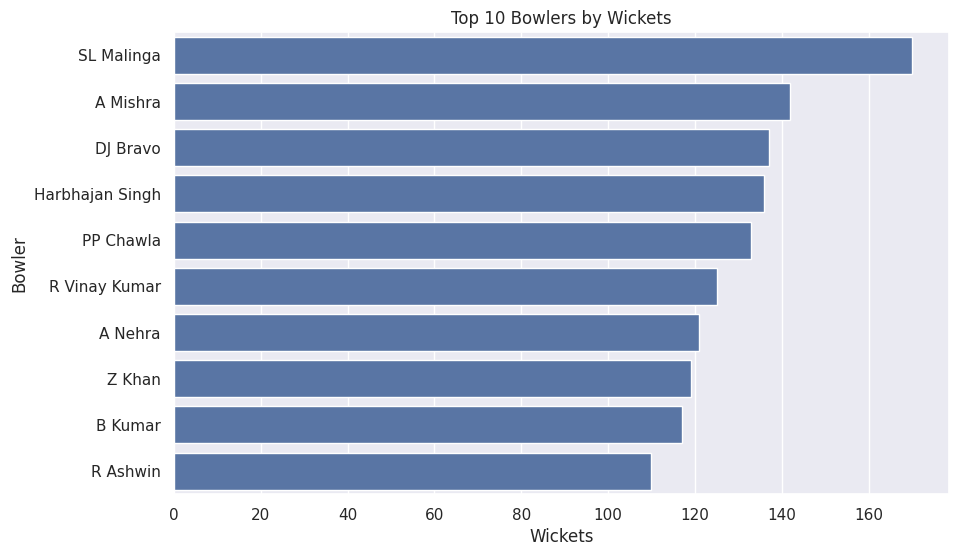

In [14]:
dismissals = deliveries[deliveries["dismissal_kind"].notna()]
bowler_wickets = dismissals.groupby("bowler")["dismissal_kind"].count().sort_values(ascending=False).head(10)

sns.barplot(x=bowler_wickets.values, y=bowler_wickets.index)
plt.title("Top 10 Bowlers by Wickets")
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.show()

## Machine Learning — Predict Match Winner


In [15]:
df_ml = matches.dropna(subset=["winner"]).copy()

for col in ["team1", "team2", "toss_winner", "venue", "winner"]:
    df_ml[col] = df_ml[col].astype("category").cat.codes

X = df_ml[["team1", "team2", "toss_winner", "venue"]]
y = df_ml["winner"]

Train-test split + model:

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.5669291338582677

## Key Insights & Findings

Example insights (you’ll fill yours based on results):

✔ Team Mumbai Indians dominates historically

✔ Toss winners choose bowling more often

✔ Winning toss = match win correlation ~ 54%

✔ Virat Kohli holds highest total runs

✔ Lasith Malinga has highest wickets

✔ Eden Gardens & Wankhede host most matches

## Conclusion

This analysis provides valuable insights into team performance, player contributions, venue influence, and toss dynamics in IPL matches. Such analytics can support team strategy, commentary analysis, and fan engagement.